In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import seaborn as sns

<Axes: ylabel='Density'>

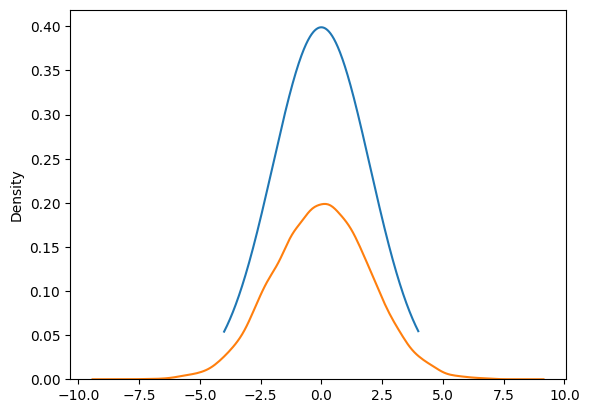

In [26]:
a = np.random.normal(0,2,10000)
t = np.arange(-4,4,0.01)
p = norm.pdf(t/2)
plt.plot(t,p)
sns.kdeplot(a)

In [2]:
def data_generator(chi=4,sigma=2,n=100000):
    #Define parameter of the distribution
    #Generate value
    W = np.random.normal(0,chi,n)
    epsilon_a = np.random.normal(0,sigma,n)
    epsilon_b = np.random.normal(0,sigma,n)
    W_A = W + epsilon_a
    W_B = W + epsilon_b
    #Generate cutoff value of College B (Here we choose 75 percentile)
    P_B = np.percentile(W_B,75)
    return W,W_A,W_B,P_B,chi,sigma


In [7]:
n= 1000000
chi = 4
sigma = 2
W = np.random.normal(0,chi,n)
epsilon_a = np.random.normal(0,sigma,n)
epsilon_b = np.random.normal(0,sigma,n)
W_A = W + epsilon_a
W_B = W + epsilon_b
#Generate cutoff value of College B (Here we choose 75 percentile)
P_B = np.percentile(W_B,75)

In [27]:
def gaussian_denominator(w_a,P_B,chi,sigma):
    mean_cond_dist = chi**2/(chi**2 + sigma**2)*w_a
    var_cond_dist = (sigma**4 + 2*sigma**2*chi**2)/(chi**2 + sigma**2)
    return norm.cdf(P_B,mean_cond_dist,np.sqrt(var_cond_dist))*norm.pdf(w_a,0,np.sqrt(sigma**2 + chi**2))

In [14]:
w_a = W_A[2]

In [18]:
w_a

-5.802892162212356

In [21]:
norm.pdf(w_a/np.sqrt(sigma**2 + chi**2),0,1)

0.1719111561961836

In [20]:
norm.pdf(w_a,0,np.sqrt(sigma**2 + chi**2))

0.03844050313452507

In [28]:
P_B = 10
h = 1e-1
test_w_a = W_A[W_B < P_B]
val_w_a = np.arange(-20,20,0.1)
cond_distribution_w_a = gaussian_denominator(val_w_a,P_B,chi,sigma)/norm.cdf(P_B/(np.sqrt(sigma**2 + chi**2)))